## Regression

### Linear Least Squares for Fitting a Line to Points on a Cartesian Plane

In [1]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


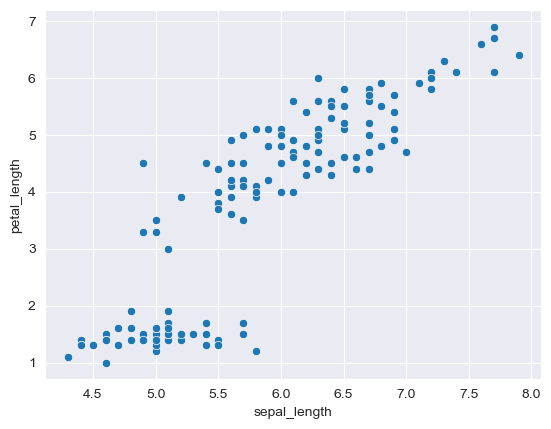

In [3]:
x = iris['sepal_length']
y = iris['petal_length']

sns.set_style('darkgrid')
_ = sns.scatterplot(x=x, y=y)

Consider fitting a line to points on a **Cartesian plane** (2-D surface, with $y$-axis perpendicular to horizontal $x$-axis). To fit such a line, the only parameters we require are a $y$-intercept (say, $\beta_0$) and a slope (say, $\beta_1$):

$$ y = \beta_0 + \beta_1 x $$

This corresponds to the case where we have a single feature (a single predictor variable, $x$) in a regression model:

$$ y = \beta_0 + \beta_1 x + \epsilon $$

The $\epsilon$ (epsilon) term denotes **error**. For a given instance $i$, $\epsilon_i$ is a measure of the difference between the true $y_i$ and the model's estimate, $\hat{y}_i$. If the model predicts $y_i$ perfectly, then $\epsilon_i = 0$.

Our objective is to find the parameters $\beta_0$ and $\beta_1$ that minimize $\epsilon$ across all the available data points.

(Note that sepal length may not be an ideal example of a predictor variable, but these iris data are conveniently available at this stage of the notebook.)

In the case of a model with a single predictor $x$, there is a fairly straightforward **linear least squares** formula we can use to estimate $\beta_1$:
$$ \hat{\beta}_1 = \frac{\text{cov}(x,y)}{\sigma^2_x} $$

(We'll dig further into the "least squares" concept in the next section, for now we can think of it as minimizing the squared error $(\hat{y}_i - y_i)^2$, which we isolate from $\text{cov}(x,y)$ via division by $\sigma^2_x$)

In [4]:
xbar, ybar = np.mean(x), np.mean(y)
print(xbar, ybar)

5.843333333333334 3.7580000000000005


In [5]:
n = iris.sepal_length.size

In [6]:
product = []
for i in range(n):
    product.append((x[i] - xbar) * (y[i] - ybar))
    
cov = sum(product) / n
cov

np.float64(1.2658200000000006)

In [7]:
beta_1 = cov / np.var(x)
beta_1

np.float64(1.8584329782548417)

With $\hat{\beta}_1$ in hand, we can then rearrange the line equation ($y = \beta_0 + \beta_1 x$) to estimate $\beta_0$:
$$ \hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x} $$

In [8]:
beta_0 = ybar - beta_1 * xbar
beta_0

np.float64(-7.101443369602459)

In [9]:
xline = np.linspace(4, 8, 1000)
yline = beta_0 + beta_1 * xline


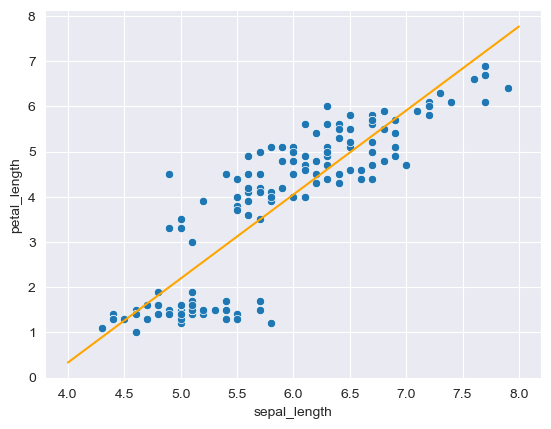

In [10]:
sns.set_style('darkgrid')
_ = sns.scatterplot(x=x, y=y)
_ = plt.plot(xline, yline, c='orange')

In regression model terms, if we were provided with a sepal length $x_i$ we could now use the parameter estimates $\hat{\beta}_0$ and $\hat{\beta}_1$ to predict the petal length of an iris:
$$ \hat{y}_i = \hat{\beta}_0 + \hat{\beta}_1 x_i $$

For instance, our model predicts that an iris with a 5.5cm-long sepal would have 3.1cm-long petal:

In [11]:
x_i = 5.5
y_i = beta_0 + beta_1 * x_i
y_i

np.float64(3.1199380107991708)

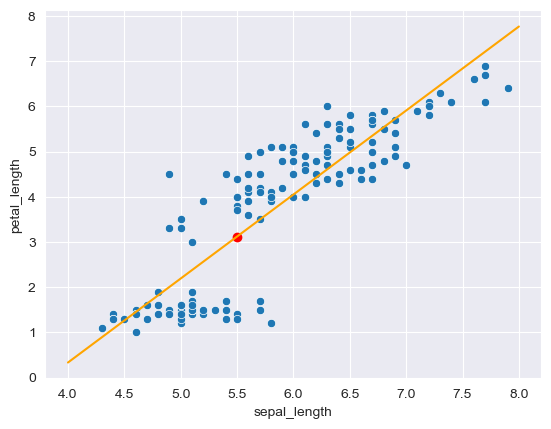

In [12]:
sns.scatterplot(x=x, y=y)
_ = plt.plot(xline, yline, c='orange')
_ = plt.scatter(x_i, y_i, c='red', marker='o')

As a second example, using the same simulated "Alzheimer's drug" data as the [*Regression in PyTorch* notebook](https://github.com/jonkrohn/ML-foundations/blob/master/notebooks/regression-in-pytorch.ipynb) and several others in the *ML Foundations* series:

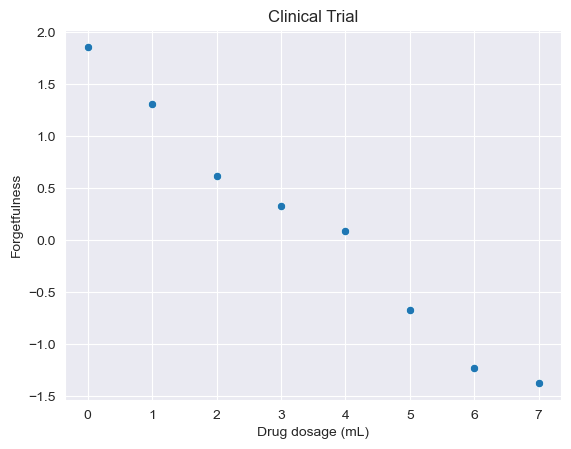

In [13]:
x = np.array([0, 1, 2, 3, 4, 5, 6, 7.])
y = np.array([1.86, 1.31, .62, .33, .09, -.67, -1.23, -1.37])

sns.scatterplot(x=x, y=y)
plt.title("Clinical Trial")
plt.xlabel("Drug dosage (mL)")
_ = plt.ylabel("Forgetfulness")

In [14]:
cov_mat = np.cov(x, y)
cov_mat

array([[ 6.        , -2.81571429],
       [-2.81571429,  1.34362143]])

$$ \hat{\beta}_1 = \frac{\text{cov}(x,y)}{\sigma^2_x} $$

In [15]:
beta_1 = cov_mat[0, 1] / cov_mat[0, 0]
beta_1

np.float64(-0.4692857142857143)

...and that:
$$ \hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x} $$

In [16]:
ybar = np.mean(y)
xbar = np.mean(x)
beta_0 = ybar - beta_1 * xbar
beta_0

np.float64(1.76)

...and, of course, our regression formula:
$$ \hat{y}_i = \hat{\beta}_0 + \hat{\beta}_1 x_i $$

In [17]:
xline = np.linspace(0, 7, 1000)
yline = beta_0 + beta_1 * xline

By administering 4.5mL of the drug, our model predicts a forgetfulness score of -0.35:

In [18]:
x_i = 4.5
y_i = beta_0 + beta_1 * x_i
x_i, y_i

(4.5, np.float64(-0.35178571428571437))

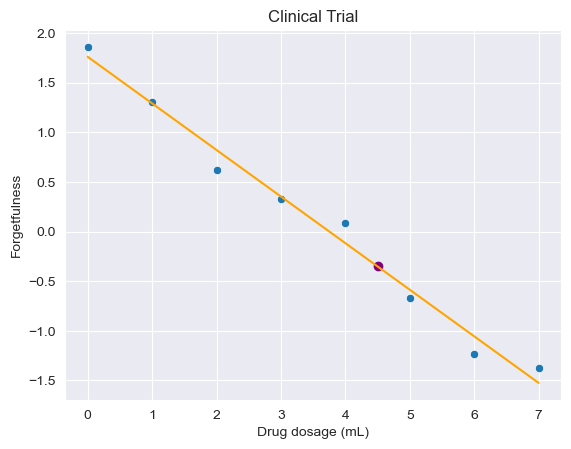

In [19]:
_ = sns.scatterplot(x=x, y=y)
plt.title("Clinical Trial")
plt.xlabel("Drug dosage (mL)")
plt.ylabel("Forgetfulness")
plt.plot(xline, yline, color='orange')
_ = plt.scatter(x_i, y_i, marker='o', color='purple')

**Exercise**: With data from female Adélie penguins, create a linear least squares model that predicts body mass with flipper length. Predict the mass of a female Adélie penguin that has a flipper length of 197mm.

In [20]:
penguins = sns.load_dataset('penguins')
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [21]:
adelie = penguins[penguins['species'] == 'Adelie'].dropna()
adelie.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [22]:
adelie.size

1022

In [23]:
adelie["body_mass_kg"] = adelie["body_mass_g"] / 1000
adelie.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,body_mass_kg
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,3.75
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,3.80
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,3.25
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,3.45
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,3.65


<Axes: >

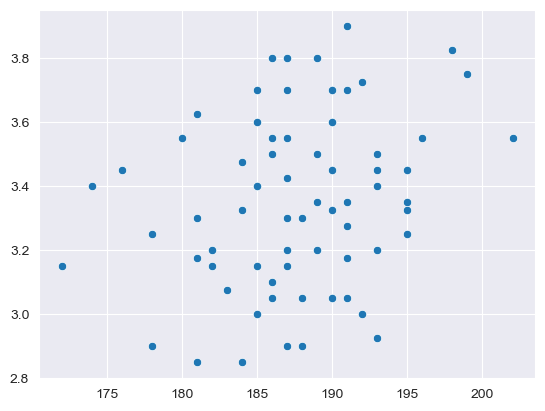

In [24]:
x = adelie[adelie["sex"] == "Female"]['flipper_length_mm'].to_numpy()
y = adelie[adelie["sex"] == "Female"]['body_mass_kg'].to_numpy()

sns.scatterplot(x=x, y=y)

In [25]:
cov_mat = np.cov(x, y)
cov_mat

array([[31.304414  ,  0.3962852 ],
       [ 0.3962852 ,  0.07256564]])

Finding Beta 1:
$$ \hat{\beta}_1 = \frac{\text{cov}(x,y)}{\sigma^2_x} $$

In [26]:
beta_1 = cov_mat[0, 1] / cov_mat[0, 0]
beta_1

np.float64(0.012659083726357767)

...and that:
$$ \hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x} $$

In [27]:
beta_0 = np.mean(y) - beta_1 * np.mean(x)
beta_0

np.float64(0.9915290574707036)

...and, of course, our regression formula:
$$ \hat{y}_i = \hat{\beta}_0 + \hat{\beta}_1 x_i $$

In [28]:
xline = np.linspace(170, 205, 1000)
yline = beta_0 + beta_1 * xline

To Predict the mass of a female Adélie penguin that has a flipper length of 197mm

In [29]:
x_i = 197
y_i = beta_0 + beta_1 * x_i
x_i, y_i

(197, np.float64(3.485368551563184))

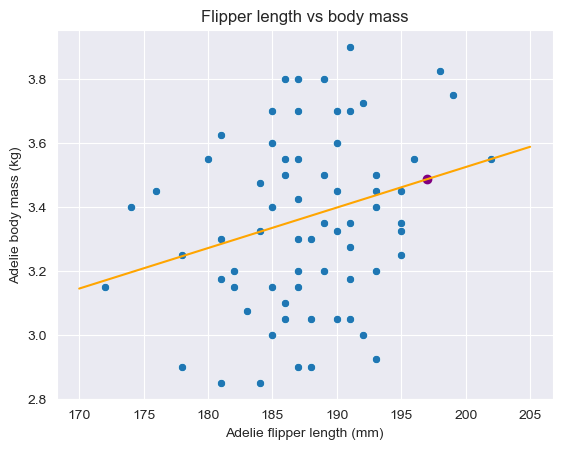

In [30]:
_ = sns.scatterplot(x=x, y=y)
plt.title("Flipper length vs body mass")
plt.xlabel("Adelie flipper length (mm)")
plt.ylabel("Adelie body mass (kg)")
plt.plot(xline, yline, color='orange')
_ = plt.scatter(x_i, y_i, marker='o', color='purple')

## Ordinary least squares (OLS)

**Ordinary least squares** (OLS) is a linear least squares method we can use to estimate the parameters of regression models that have more than one predictor variable, e.g.:

$$ y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3 + \epsilon $$

Generalizing to $m$ predictors:
$$ y = \beta_0 + \sum_{j=1}^m \beta_j x_j + \epsilon $$

To keep the calculations as simple as possible, however, for now we'll stick with a single predictor $x$ (in an example adapted from [here](https://en.wikipedia.org/wiki/Linear_least_squares#Example)):

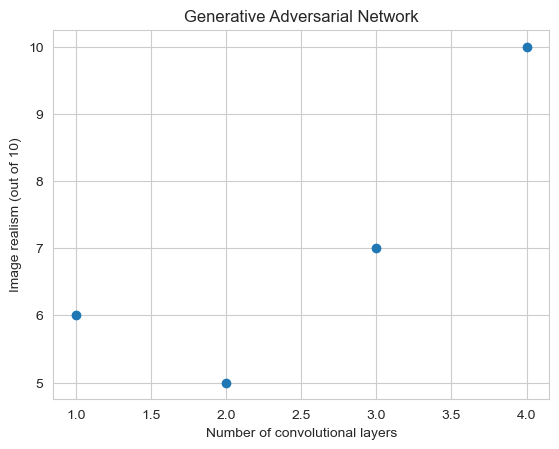

In [32]:
x = np.array([1, 2, 3, 4.])
y = np.array([6, 5, 7, 10.])

sns.set_style('whitegrid')

fig, ax = plt.subplots()
plt.title('Generative Adversarial Network')
plt.xlabel('Number of convolutional layers')
plt.ylabel('Image realism (out of 10)')
_ = ax.scatter(x, y)

As is typical in regression model-fitting, we have an *overdetermined* system of linear algebra equations. From the general regression equation $y = \beta_0 + \beta_1 x$, we have four equations (one for each instance $i$) with the two unknown parameters $\beta_0$ and $\beta_1$ shared across the system.
$$ 6 = \beta_0 + \beta_1 $$
$$ 5 = \beta_0 + 2\beta_1 $$
$$ 7 = \beta_0 + 3\beta_1 $$
$$ 10 = \beta_0 + 4\beta_1 $$

Since we have more equations than unknowns, we can't solve for the parameters through algebraic rearraging. We can, however, estimate parameters that approximately solve all of the equations with the *Moore-Penrose Pseudoinverse* (from [*Linear Algebra II*](https://github.com/jonkrohn/ML-foundations/blob/master/notebooks/2-linear-algebra-ii.ipynb)) or we could use partial-derivative calculus as we'll use here. Either way, with the OLS approach, our objective is to minimize the "sum of squared errors" (SSE).

The squared error (a.k.a. quadratic cost, from *Calc II*) for a given instance $i$ is $(\hat{y}_i-y_i)^2$.

The SSE over $n$ instances is then:
$$ \sum_{i=1}^n (\hat{y}_i-y_i)^2 $$

In this case, where $\hat{y}_i = \beta_0 + \beta_1 x_i$, we can define the SSE function as:
$$ S(\beta_0, \beta_1) = \sum_{i=1}^n (\beta_0 + \beta_1 x_i - y_i)^2 $$

Then (rather laboriously) expanding out the squares and simplifying the result by combining like terms:
$$ S(\beta_0, \beta_1) = 4\beta_0^2 + 30\beta_1^2 + 20\beta_0\beta_1 - 56\beta_0 - 154\beta_1 + 210 $$

To minimize SSE, we can now use partial derivatives. Specifically, to find where there is no slope of $S(\beta_0, \beta_1)$ with respect to $\beta_0$:
$$ \frac{\partial S}{\partial \beta_0} = 8\beta_0 + 20\beta_1 - 56 = 0 $$
...and $\beta_1$:
$$ \frac{\partial S}{\partial \beta_1} = 20\beta_0 + 60\beta_1 - 154 = 0 $$

Rearranging, we obtain a system of two linear equations called the **normal equations** (however many parameters are in the model is how many rows of equations we'll have in the system):
$$ 8\beta_0 + 20\beta_1 = 56 $$
$$ 20\beta_0 + 60\beta_1 = 154 $$

A handy numerical approach for solving for $\beta_0$ and $\beta_1$ is matrix inversion (which we covered in detail toward the end of the [*Intro to Linear Algebra* notebook](https://github.com/jonkrohn/ML-foundations/blob/master/notebooks/1-intro-to-linear-algebra.ipynb)).

To avoid confusion with with the broader $x$ (number of GAN conv layers) and $y$ variables (image realism), let's use $A$ for the matrix of "inputs" and $z$ for the vector of "outputs", with the vector $w$ containing the unknown weights $\beta_0$ and $\beta_1$:
$$ Aw = z $$

In [33]:
A = np.array([[8, 20],[20, 60]])
A

array([[ 8, 20],
       [20, 60]])

In [35]:
z = np.array([56, 154])
z

array([ 56, 154])

To solve for $w$, we can invert $A$ (assuming $A$ is not singular; i.e., all of its columns are independent):
$$ w = A^{-1}z $$

In [36]:
Ainv = np.linalg.inv(A)
Ainv

array([[ 0.75, -0.25],
       [-0.25,  0.1 ]])

In [37]:
w = np.dot(Ainv, z)
w

array([3.5, 1.4])

Thus, the line that minimizes the squared error across all four equations has the parameters $\hat{\beta}_0 = 3.5$ and $\hat{\beta}_1 = 1.4$:
$$ \hat{y} = 3.5 + 1.4 x $$

In [38]:
xline = np.linspace(1, 4, 1000)
yline = w[0] + w[1]*xline

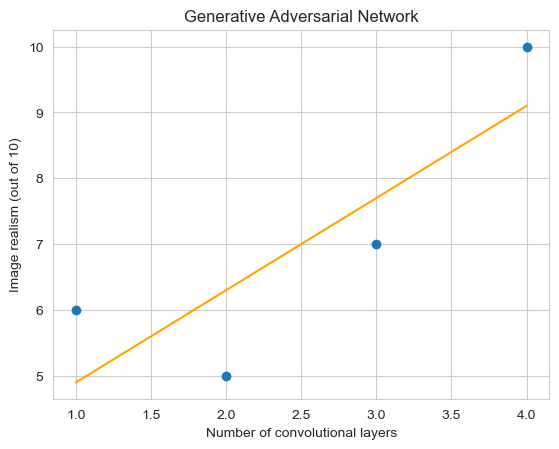

In [39]:
fig, ax = plt.subplots()
plt.title('Generative Adversarial Network')
plt.xlabel('Number of convolutional layers')
plt.ylabel('Image realism (out of 10)')
ax.scatter(x, y)
_ = plt.plot(xline, yline, color='orange')

For fun, following the linear algebra in the slides, we could output $\hat{y}$ across all the instances $i$:
$$ \hat{y} = Xw $$

In [40]:
X = np.concatenate([np.matrix(np.ones(x.size)).T, np.matrix(x).T], axis=1)
X

matrix([[1., 1.],
        [1., 2.],
        [1., 3.],
        [1., 4.]])

In [41]:
yhat = np.dot(X, w)
yhat

matrix([[4.9, 6.3, 7.7, 9.1]])

Incidentally, **residuals** are the distances between $\hat{y}_i$ and $y_i$:

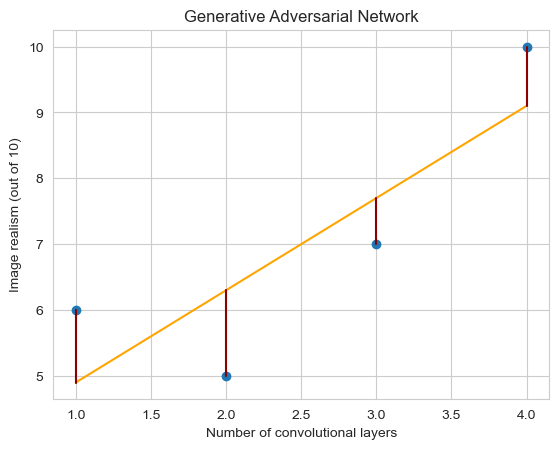

In [42]:
fig, ax = plt.subplots()
plt.title('Generative Adversarial Network')
plt.xlabel('Number of convolutional layers')
plt.ylabel('Image realism (out of 10)')
ax.scatter(x, y)
_ = plt.plot(xline, yline, color='orange')
for i in range(x.size):
    plt.plot([x[i],x[i]], [y[i],yhat[0,i]], color='darkred')

The square of these residuals is what we minimize with SSE in OLS regression.

The above OLS approach expands to a wide variety of circumstances:

* Multiple features ($x$, the predictors)
* Polynomial (typically quadratic) features, e.g., $y = \beta_0 + \beta_1 x + \beta_2 x^2$
* Interacting features, e.g., $y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_1 x_2$
* Discrete, categorical features, incl. any combination of continuous and discrete features

As an example of the latter...

In [43]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


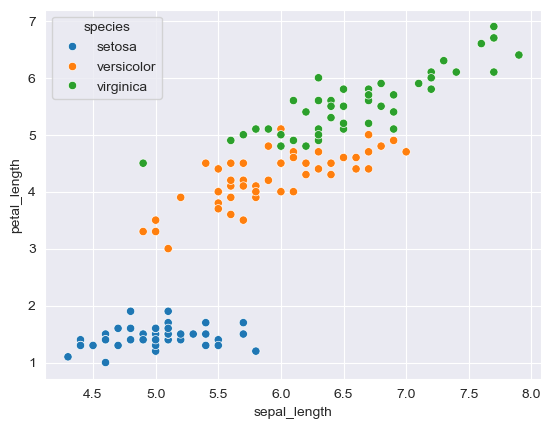

In [44]:
sns.set_style('darkgrid')
_ = sns.scatterplot(x='sepal_length', y='petal_length', hue='species', data=iris)

In [45]:
import pandas as pd

In [46]:
dummy = pd.get_dummies(iris.species, dtype = 'int64') # int64 dtype required to avoid ValueError when calling sm.OLS() below
dummy

,setosa,versicolor,virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


In [47]:
y = iris.petal_length

In [48]:
X = pd.concat([iris.sepal_length, dummy.setosa, dummy.versicolor], axis=1)
X # virginia as "baseline" where setosa and versicolor are both 0

,sepal_length,setosa,versicolor
0,5.1,1,0
1,4.9,1,0
2,4.7,1,0
3,4.6,1,0
4,5.0,1,0
...,...,...,...
145,6.7,0,0
146,6.3,0,0
147,6.5,0,0
148,6.2,0,0


In [49]:
import statsmodels.api as sm
X = sm.add_constant(X)
X

,const,sepal_length,setosa,versicolor
0,1.0,5.1,1,0
1,1.0,4.9,1,0
2,1.0,4.7,1,0
3,1.0,4.6,1,0
4,1.0,5.0,1,0
...,...,...,...,...
145,1.0,6.7,0,0
146,1.0,6.3,0,0
147,1.0,6.5,0,0
148,1.0,6.2,0,0


In [50]:
model = sm.OLS(y, X)
results = model.fit() 
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           petal_length   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     1890.
Date:                Sun, 20 Apr 2025   Prob (F-statistic):          1.46e-116
Time:                        21:51:23   Log-Likelihood:                -21.237
No. Observations:                 150   AIC:                             50.47
Df Residuals:                     146   BIC:                             62.52
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            1.3877      0.301      4.611      0.000       0.793       1.982
sepal_length     0.6321      0.045     13.962      0.000       0.543       0.722
setosa          -3.0900      0.091    -33.870      0.000      -3.270      -2.910
versicolor      -0.8799      0.064    -13.800      0.000      -1.006      -0.754
==============================================================================
Omnibus:                        0.652   Durbin-Watson:                   1.757
Prob(Omnibus):                  0.722   Jarque-Bera (JB):                0.310
Skew:                          -0.022   Prob(JB):                        0.856
Kurtosis:                       3.218   Cond. No.                         82.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Our earlier iris model, with sepal length as the only predictor of petal length, had $r^2 = 0.76$. In our latest iris model, a whopping 97% of the variance in petal length is explained by the predictors.

In [51]:
beta = results.params
beta

const           1.387660
sepal_length    0.632110
setosa         -3.090002
versicolor     -0.879864
dtype: float64

In [52]:
xline = np.linspace(4, 8, 1000)
vi_yline = beta['const'] + beta['sepal_length']*xline
se_yline = beta['const'] + beta['sepal_length']*xline + beta['setosa']
ve_yline = beta['const'] + beta['sepal_length']*xline + beta['versicolor']

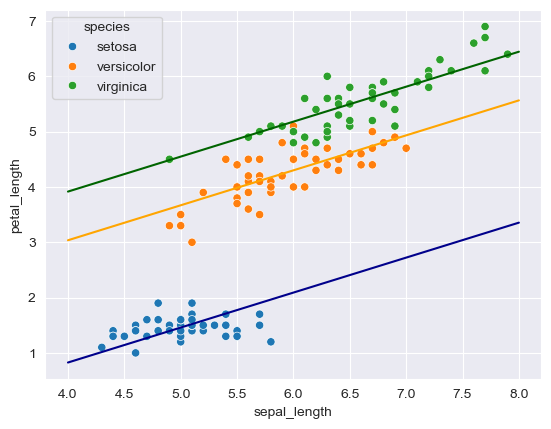

In [53]:
sns.scatterplot(x='sepal_length', y='petal_length', hue='species', data=iris)
plt.plot(xline, vi_yline, color='darkgreen')
plt.plot(xline, se_yline, color='darkblue')
_ = plt.plot(xline, ve_yline, color='orange')

Now using our refined model, such that it predicts the petal length of a *versicolor* iris with a 5.5cm-long sepal:

In [54]:
x_sepall_i = 5.5
x_setosa_i = 0
x_versic_i = 1

In [55]:
y_i = beta['const'] + beta['sepal_length']*x_sepall_i + beta['setosa']*x_setosa_i + beta['versicolor']*x_versic_i
y_i

np.float64(3.984400080089948)

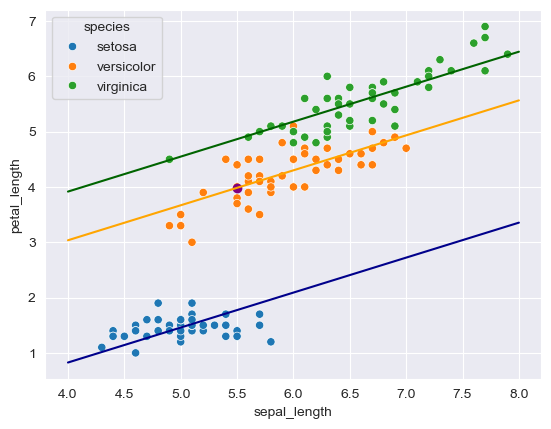

In [56]:
sns.scatterplot(x='sepal_length', y='petal_length', hue='species', data=iris)
plt.plot(xline, vi_yline, color='darkgreen')
plt.plot(xline, se_yline, color='darkblue')
plt.plot(xline, ve_yline, color='orange')
_ = plt.scatter(x_sepall_i, y_i, marker='o', color='purple')

...or a *virginica* with a sepal of the same length:

In [57]:
x_sepall_i = 5.5
x_setosa_i = 0
x_versic_i = 0 # the only change

In [58]:
x_i = np.array([1, x_sepall_i, x_versic_i, x_versic_i])

In [59]:
y_i = np.dot(beta, x_i)

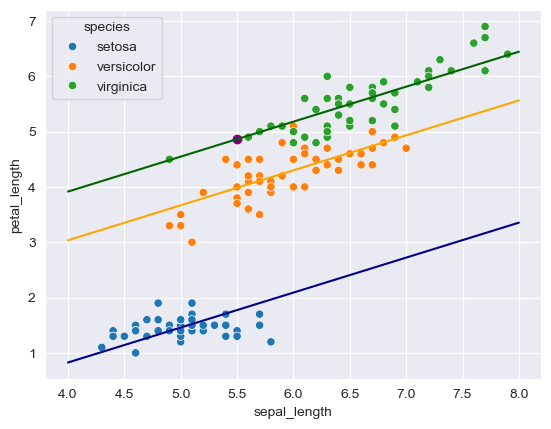

In [60]:
sns.scatterplot(x='sepal_length', y='petal_length', hue='species', data=iris)
plt.plot(xline, vi_yline, color='darkgreen')
plt.plot(xline, se_yline, color='darkblue')
plt.plot(xline, ve_yline, color='orange')
_ = plt.scatter(x_i[1], y_i, marker='o', color='purple')

(It is also possible to have the slope vary by categorical variable, not only the $y$-intercept. This is a *hierarchical linear model* and the classic text on it is [Gelman & Hill, 2006](https://amzn.to/3hoOevb).)

**Exercise**:
Download the Boston housing dataset (process is immediately below) and use the statsmodels `OLS()` method to create a model that uses at least a few of the provided features to predict house price.

In [ ]:
import pandas as pd
df = pd.read_csv('BostonHousing.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [65]:
y = df["medv"].to_numpy()
y[0:20]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2])

In [69]:
X = df
X.head()


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


## Logistic Regression

Reasonably often we'd like to have a regression model that predicts a binary outcome (e.g., identifying if a fast-food item is a hot dog or not a hot dog). This can be accomplished with **logistic regression**, which adapts linear regression by including the *logit* function:
$$ x = \text{log}(\frac{p}{1-p}) $$
This function uses the natural logarithm and maps a binary probability $p$ (which can only range from zero to one) to an unbounded range ($-\infty$ to $\infty$).

In [70]:
def logit(my_p): # this is also available as scipy.special.logit()
    return np.log(my_p/(1-my_p))

In [71]:
logit(0.5)

np.float64(0.0)

In [74]:
logit(0.1)

np.float64(-2.197224577336219)

In [ ]:
logit(0.01) # closer to zero approaches negative infinity

np.float64(-4.59511985013459)

In [76]:
logit(0.99) # closer to one approaches positive infinity

np.float64(4.595119850134589)

More specifically, logistic regression makes use of the *expit* function (a.k.a., logistic function), which is the inverse of the logit. That is, it returns a probability $p$ when passed some unbounded input $x$:
$$ p = \frac{1}{1+e^{-x}} $$

In [77]:
def expit(my_x): # this is also available as scipy.special.expit()
    return 1/(1+np.exp(-my_x))

In [78]:
expit(4.595119850134589)

np.float64(0.99)

This logistic function allows us to map the unbounded output of a linear regression model to a probability ranging from zero to one.

Let's dig right into a hands-on example:

In [79]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [80]:
np.unique(titanic["survived"], return_counts=True)

(array([0, 1]), array([549, 342]))

In [81]:
np.unique(titanic["sex"], return_counts=True)

(array(['female', 'male'], dtype=object), array([314, 577]))

In [82]:
np.unique(titanic["class"], return_counts=True)

(array(['First', 'Second', 'Third'], dtype=object), array([216, 184, 491]))

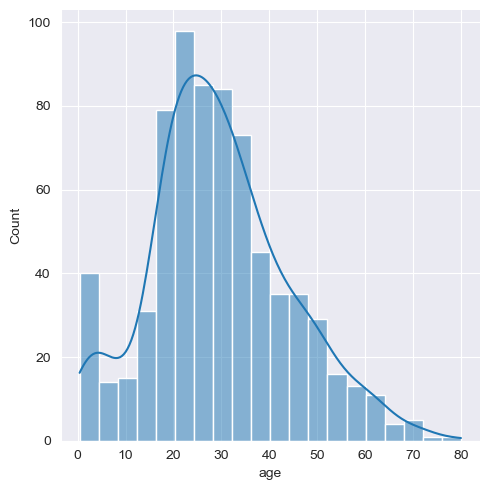

In [85]:
_ = sns.displot(x = titanic["age"], kde=True)

In [86]:
gender = pd.get_dummies(titanic['sex'], dtype = 'int64')
gender

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [87]:
clas = pd.get_dummies(titanic['class'], dtype = 'int64')
clas


,First,Second,Third
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1
...,...,...,...
886,0,1,0
887,1,0,0
888,0,0,1
889,1,0,0


In [88]:
y = titanic["survived"]
X = pd.concat([clas.First, clas.Second, gender.female, titanic.age], axis=1)
X = sm.add_constant(X)

In [89]:
model = sm.Logit(y, X, missing='drop') # drop missing values

In [90]:
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.453279
         Iterations 6


In [91]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               survived   No. Observations:                  714
Model:                          Logit   Df Residuals:                      709
Method:                           MLE   Df Model:                            4
Date:                Mon, 21 Apr 2025   Pseudo R-squ.:                  0.3289
Time:                        18:12:10   Log-Likelihood:                -323.64
converged:                       True   LL-Null:                       -482.26
Covariance Type:            nonrobust   LLR p-value:                 2.074e-67
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.3264      0.248     -5.351      0.000      -1.812      -0.841
First          2.5806      0.281      9.169      0.000       2.029       3.132
Second         1.2708      0.244      5.207      0.000       0.793       1.749
female         2.5228      0.207     12.164      0.000       2.116       2.929
age           -0.0370      0.008     -4.831      0.000      -0.052      -0.022
==============================================================================
"""

In [92]:
beta = result.params
beta

const    -1.326394
First     2.580625
Second    1.270826
female    2.522781
age      -0.036985
dtype: float64

As an example, our model suggests a 17-year-old female traveling in first class (such as Rose in the 1997 James Cameron film) had a 95.9% of chance of surviving:

In [93]:
linear_out = beta['const'] + beta['First']*1 + beta['Second']*0 + beta['female']*1 + beta['age']*17
linear_out

np.float64(3.1482631377764765)

In [94]:
expit(linear_out)

np.float64(0.9588402300157423)

In contrast, a 20-year-old male traveling in third class had an 11.2% chance of surviving:

In [ ]:
jack = np.array([1, 0, 0, 0, 20])

In [96]:
linear_out = np.dot(beta, jack)
linear_out

np.float64(-1.9551430995959052)

In [97]:
expit(linear_out)

np.float64(0.12399363756921496)

**Exercises**

1. Use the scikit-learn `train_test_split()` method ([documentation here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)) to split the titanic data into a training data set (say, two thirds of the data) and a test data set (one third of the data).

2. Re-train the OLS model above using your newly-created training data set. Using the test data set, test the model's quality, e.g., with respect to:

    * Accuracy (using a standard 50% binary classification threshold)
    * Area under the receiving operator characteristic curve (we covered this in [Calculus II](https://github.com/jonkrohn/ML-foundations/blob/master/notebooks/4-calculus-ii.ipynb)).

3. Use your own creative whims to add additional features to an OLS model and train it using the training set. How does your new model compare on the test data set metrics relative to the baseline model? And how do they compare to the [Kaggle leaderboard](https://www.kaggle.com/c/titanic/leaderboard)?